# Guru Charan
# Lab 3

Part A:

Problem Statement: Consider the dataset Credit Card Fraud Detection from Kaggle and build a machine-learning model that detects whether a credit card transaction is fraudulent. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using the logistic regression to build the model, and evaluate to determine the accuracy. https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [66]:
#Import required packages
import pandas as pd 
import matplotlib.pylab as plt

In [67]:
#Read the credit card csv data 
creditCardDF = pd.read_csv("../../../Csv/creditcard.csv")

In [68]:
#Explore the dataset
creditCardDF.head(8)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0


In [69]:
print(creditCardDF.columns)
print(creditCardDF.info())

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284

No Null or blank values 

In [70]:
print(creditCardDF.describe())

                Time            V1            V2            V3            V4   
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  \
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9   
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  \
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [71]:
creditCardDF["Class"]

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

No Null or blank values 

In [72]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    #df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    #plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

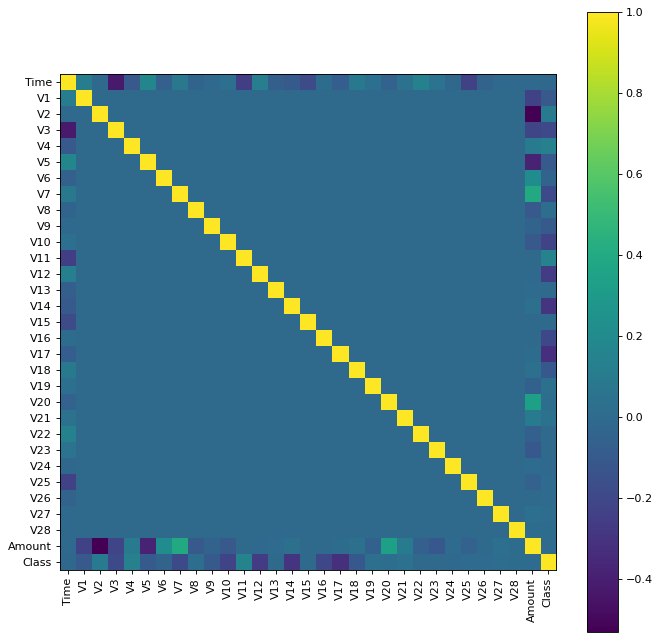

In [73]:
plotCorrelationMatrix(creditCardDF, 10)

Feature 'Class' is the binary classifier variable, it takes value 1 in case of fraud and 0 if it is not fraud.

Clean the data

In [74]:
# Checking Duplicate rows
print("Duplicate rows:", creditCardDF.duplicated().sum())

Duplicate rows: 1081


In [75]:
# Remove duplicate rows
creditCardDF.drop_duplicates(inplace=True) # inplace will remove duplicates from original dataset
# Reset the index
creditCardDF.reset_index(drop=True, inplace=True) #drop=True parameter is set to True to drop the previous index column.


In [76]:
#Standardize the 'Amount' column for better model fit 
#The StandardScaler is a preprocessing technique that scales the data such that it has a mean of 0 and a standard deviation of 1.
print(creditCardDF['Amount'].describe())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
creditCardDF.Amount.values.reshape(-1, 1)
creditCardDF['Amount'] = scaler.fit_transform(creditCardDF['Amount'].values.reshape(-1, 1))
display(creditCardDF['Amount'])
print(creditCardDF['Amount'].describe())

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64


0         0.244200
1        -0.342584
2         1.158900
3         0.139886
4        -0.073813
            ...   
283721   -0.350252
283722   -0.254325
283723   -0.082239
283724   -0.313391
283725    0.513290
Name: Amount, Length: 283726, dtype: float64

count    2.837260e+05
mean    -5.409347e-17
std      1.000002e+00
min     -3.533268e-01
25%     -3.309625e-01
50%     -2.654671e-01
75%     -4.378088e-02
max      1.022476e+02
Name: Amount, dtype: float64


In [77]:
#Drop time feature, useless for this 
creditcard = creditCardDF.drop('Time', axis=1)
display(creditcard)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


In [78]:
#Assign independent and dependent variables 
X = creditCardDF.drop('Class',axis=1)
y = creditcard['Class']
print(X.head())
y.head()

   Time        V1        V2        V3        V4        V5        V6        V7   
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  \
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24   
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928  \
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27 

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [79]:
# Now split the dataset into training and testing dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 32)

In [80]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
58245,48412.0,-1.802775,-0.191083,0.966539,-1.695512,0.524544,-1.203161,0.078589,0.563697,0.259299,...,-0.043614,0.244826,0.327798,-0.402308,0.232462,0.820333,-0.642619,-0.051612,-0.173198,-0.310595
55225,46949.0,0.489649,-2.668605,-0.847056,-1.032277,0.358327,4.289415,-1.221183,0.978427,0.214292,...,1.108626,0.415716,0.304070,-0.595878,1.105579,0.604182,-0.023725,-0.021517,0.094847,1.535658
82581,59598.0,-1.713679,-1.965047,2.445347,0.695255,1.091002,-0.392033,-1.728452,0.441595,1.068072,...,0.810817,0.161366,0.324688,0.209522,-0.309141,-0.272401,1.269773,0.060124,0.174340,-0.185595
23812,32976.0,-1.175878,1.606685,0.282874,1.347067,-0.553325,-0.389251,0.315741,0.525236,-0.296081,...,-0.216506,0.181880,0.659899,0.092929,0.407850,-0.562417,-0.309464,-0.320139,-0.094400,-0.193582
88791,62432.0,-1.007525,1.183560,0.013768,-1.358748,2.646440,3.271070,0.363438,0.873451,-0.583209,...,0.357127,-0.565676,-1.764265,-0.070503,0.948552,0.265602,-0.069221,0.214704,0.183956,-0.347376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216135,140684.0,-0.004731,0.896965,1.285538,2.637611,0.647429,1.389995,0.234218,0.438923,-1.204480,...,-0.104894,0.278772,0.726700,-0.014780,0.250463,-0.384100,-0.072468,0.038007,0.016508,-0.193342
282558,171753.0,0.049234,0.801671,0.212734,-0.610725,0.405367,-1.054367,0.969279,-0.157553,0.075190,...,-0.074462,-0.276941,-0.658526,0.066896,-0.137607,-0.493096,0.149795,0.241217,0.094564,-0.329405
75062,56021.0,-0.822134,-0.025282,1.166999,1.406574,-0.965104,1.553877,0.083101,0.907471,-0.123710,...,0.340780,0.253456,0.536363,0.712060,-0.286636,-0.782608,-0.469359,0.020138,0.017219,0.565207
130949,79602.0,1.297393,0.058331,-0.162479,0.176710,0.327561,0.269554,-0.079203,0.023646,0.212908,...,-0.061934,-0.161841,-0.437408,-0.116445,-1.305592,0.439111,0.485302,-0.026613,-0.001572,-0.293422


In [81]:
y_test

111800    0
165578    0
144938    0
79750     0
129471    0
         ..
223853    0
61631     0
242100    0
19432     0
280808    0
Name: Class, Length: 85118, dtype: int64

Training Model(Logistic Regression)

In [82]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

d:\Conestoga\MachineLearninigIntro\Week2\CSCN8010\venv\CSCN8010_classic_ml\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
#predict the test values
y_pred = model.predict(X_test)

In [84]:
#Check the accuracy score
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classificationReport = classification_report(y_test, y_pred)
print("Classification Report:\n",classificationReport)

Accuracy: 0.9990483798961441
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84979
           1       0.72      0.68      0.70       139

    accuracy                           1.00     85118
   macro avg       0.86      0.84      0.85     85118
weighted avg       1.00      1.00      1.00     85118



* The accuracy is very high (99.92%).
* Precision is 0.72. A high precision indicates that the model makes fewer false positive predictions, which means it is more accurate when it predicts a positive class.
* Recall is 0.64 in predicting fraud transactions. Its not that great while predicting fraud transactions. A high recall value indicates that the model successfully captures a large percentage of actual positive instances.  

## Part B:

Problem Statement: Use the following insurance dataset and build a predictive system to predict insurance costs. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using linear regression to build the model, and evaluate the accuracy of predicting the insurance cost. https://www.kaggle.com/datasets/mirichoi0218/insurance

In [85]:
#load the insurance csv dataset
insuranceDF = pd.read_csv("../../../Csv/insurance.csv")

In [86]:
print(insuranceDF.head(6))
print(creditCardDF.columns)
print(creditCardDF.info())
print(insuranceDF.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-

No null values

In [87]:
#Check for duplicates
insuranceDF.duplicated().sum()

#remove the duplicate
insuranceDF.drop_duplicates(inplace=True) # inplace will remove duplicates from original dataset
# Reset the index
insuranceDF.reset_index(drop=True, inplace=True) #drop=True parameter is set to True to drop the previous index column.
len(insuranceDF)

1337

In [88]:
#collumns sex, smoker and region are categorical values
from sklearn.calibration import LabelEncoder

categoricalColumns = ['sex', 'smoker', 'region']
# Change catergorical variables into numeric variables
label_encoder = LabelEncoder()
for column in categoricalColumns:
    insuranceDF[column] = label_encoder.fit_transform(insuranceDF[column])

display(insuranceDF)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,1,10600.54830
1333,18,0,31.920,0,0,0,2205.98080
1334,18,0,36.850,0,0,2,1629.83350
1335,21,0,25.800,0,0,3,2007.94500


In [89]:
#Assign dependant and independant variables
X = insuranceDF.drop('charges', axis=1)
y = insuranceDF['charges']

# Now split the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1332,50,1,30.970,3,0,1
1333,18,0,31.920,0,0,0
1334,18,0,36.850,0,0,2
1335,21,0,25.800,0,0,3


In [91]:
#Train the model
from sklearn.linear_model import LinearRegression

linearRegmodel = LinearRegression()
linearRegmodel.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred = linearRegmodel.predict(X_test)

In [98]:
# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np


print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"R-squared (R2) Score: {r2_score(y_test, y_pred)}")

Mean Squared Error (MSE): 38935221.01064077
Mean Absolute Error (MAE): 4182.8037770701585
R-squared (R2) Score: 0.7724652729621757


* Mean Squared Error (MSE): The MSE measures the average squared difference between the predicted insurance costs and the actual insurance costs. A lower MSE value indicates that the model's predictions are closer to the actual values.
* Mean Absolute Error (MAE): The MAE measures the average absolute difference between the predicted and actual insurance costs. Like the RMSE, it provides a sense of how far off the predictions are from the true values. The MAE is approximately 4182.80, which means the average absolute difference between the predicted and actual insurance costs is about $4182.80.
* R-squared (R2) Score: The R-squared score is a value between 0 and 1 that represents the proportion of the variance in the target variable (insurance costs) that can be explained by the model. In this case, the R-squared score is approximately 0.77, which means that around 77% of the variance in insurance costs is explained by the model. A higher R-squared score indicates a better fit of the model to the data.<br>


The model demonstrates some level of predictive capability, as indicated by the R-squared score.However, there is still considerable room for improvement in accurately predicting insurance costs, as indicated by the relatively high values of RMSE and MAE. By implementing these strategies, we aim to achieve more accurate and precise predictions of insurance costs.